In [10]:
import numpy as np
import pandas as pd
from copy import copy,deepcopy
import scipy as sp
import matplotlib.pyplot as plt
from math import fabs
import random as randn
from sklearn.datasets import load_wine

In [11]:
data = load_wine()
df = pd.DataFrame(data.data)
df.columns = data.feature_names

print(df.head())
x=df["total_phenols"].values
y=df["proanthocyanins"].values
'''data = pd.read_csv('CASP.csv')
print(data.head())
x = np.array(data.get('F1'),dtype='float')[:500]
y = np.array(data.get('F3'),dtype='float')[:500]'''
'''x = [i for i in range(-50,50)]
y = [i**2/100+randn.randint(0,10)/10 for i in x]
for i in range(0,10):
    x.append(randn.randint(-50,50))
    y.append(randn.randint(0,25))'''

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

'x = [i for i in range(-50,50)]\ny = [i**2/100+randn.randint(0,10)/10 for i in x]\nfor i in range(0,10):\n    x.append(randn.randint(-50,50))\n    y.append(randn.randint(0,25))'

In [12]:
d = 1
#eps определяет точность для оценки, сколкьо знаков после нуля имеют значение
eps = 0
LSM = sp.polyfit(x, y, d, full=False)
if round(LSM[0],eps)!=0 and round(LSM[1],eps)!=0:
    while round(LSM[0],eps)!=0 and round(LSM[1],eps)!=0:
        d += 1
        LSM = sp.polyfit(x, y, d, full=False)
        f_LSM = sp.poly1d(LSM)
    d-=2
    LSM = sp.polyfit(x, y, d, full=False)
f_LSM = sp.poly1d(LSM)
print(f_LSM)

 
0.5601 x + 0.3055


In [13]:
from scipy.optimize import minimize
def Huber(U,sigm):
    if fabs(U)<sigm:
        return 0.5*(U**2)
    else:
        return sigm*(fabs(U)-0.5*sigm)
def Tukey(U,sigm):
    if fabs(U)<=sigm:
        return 1-(1-(U/sigm)**2)
    else:
        return 1
def Sum_error(E, *args):
    x,y,F,d,sigm = args
    H=np.array([[i**j for j in range(d+1)]for i in x],dtype='float64')
    total_error_function = 0
    for i in range(len(E)):
        U=0
        for j in range(len(H[i])):
            U+=E[j]*H[i][j]
        U=y[i]-U
        total_error_function+=F(U,sigm)
    return total_error_function

In [14]:
d=1
sigm=1.5
#huber = minimize(Sum_error,x0=list(0 for i in range(d+1)),args=(x,y,Huber,d,1)).x[::-1]
huber = minimize(Sum_error,x0=sp.polyfit(x, y, d, full=False)[::-1],args=(x,y,Huber,d,1)).x[::-1]
if round(huber[0],eps)!=0 and round(huber[1],eps)!=0:
    while round(huber[0],eps)!=0 and round(huber[1],eps)!=0:
        d+=1
        #huber = minimize(Sum_error,x0=list(0 for i in range(d+1)),args=(x,y,Huber,d,1)).x[::-1]
        huber = minimize(Sum_error,x0=sp.polyfit(x, y, d, full=False)[::-1],args=(x,y,Huber,d,1)).x[::-1]
    #d-=2
    #huber = minimize(Sum_error,x0=list(0 for i in range(d+1)),args=(x,y,Huber,d,1)).x[::-1]
    huber = minimize(Sum_error,x0=sp.polyfit(x, y, d, full=False)[::-1],args=(x,y,Huber,d,1)).x[::-1]
huber_D=copy(huber)
huber_D[-1]-=sigm
huber_U=copy(huber)
huber_U[-1]+=sigm
f_huber = sp.poly1d(huber)
f_huber_d = sp.poly1d(huber_D)
f_huber_u = sp.poly1d(huber_U)
print(f_huber)

        6         5         4         3         2
0.2807 x - 3.612 x + 18.58 x - 49.45 x + 72.83 x - 55.62 x + 16.43


In [15]:
d=1
sigm=4
eps=0
#tukey = minimize(Sum_error,x0=list(0 for i in range(d+1)),args=(x,y,Tukey,d,sigm)).x[::-1]
tukey = minimize(Sum_error,x0=sp.polyfit(x, y, d, full=False)[::-1],args=(x,y,Tukey,d,1)).x[::-1]
if round(tukey[0],eps)!=0 and round(tukey[1],eps)!=0:
    while round(tukey[0],eps)!=0 and round(tukey[1],eps)!=0:
        d+=1
        #tukey = minimize(Sum_error,x0=list(0 for i in range(d+1)),args=(x,y,Tukey,d,sigm)).x[::-1]
        tukey = minimize(Sum_error,x0=sp.polyfit(x, y, d, full=False)[::-1],args=(x,y,Tukey,d,1)).x[::-1]
    #d-=2
    #tukey = minimize(Sum_error,x0=list(0 for i in range(d+1)),args=(x,y,Tukey,d,sigm)).x[::-1]
    tukey = minimize(Sum_error,x0=sp.polyfit(x, y, d, full=False)[::-1],args=(x,y,Tukey,d,1)).x[::-1]
tukey_D=copy(tukey)
tukey_D[-1]-=sigm
tukey_U=copy(tukey)
tukey_U[-1]+=sigm
f_tukey = sp.poly1d(tukey)
f_tukey_d = sp.poly1d(tukey_D)
f_tukey_u = sp.poly1d(tukey_U)
print(f_tukey)

        6         5         4         3         2
0.2808 x - 3.612 x + 18.59 x - 49.45 x + 72.83 x - 55.62 x + 16.43


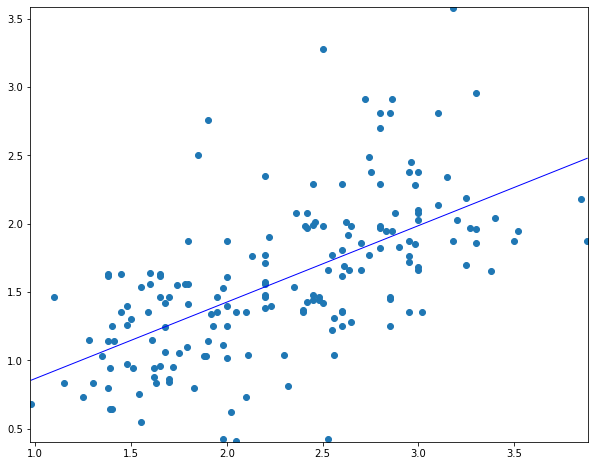

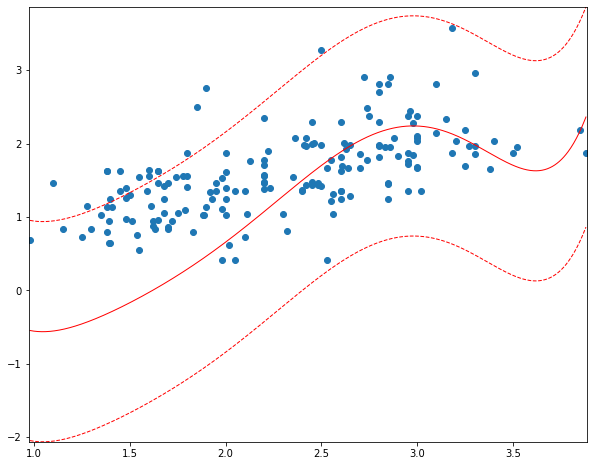

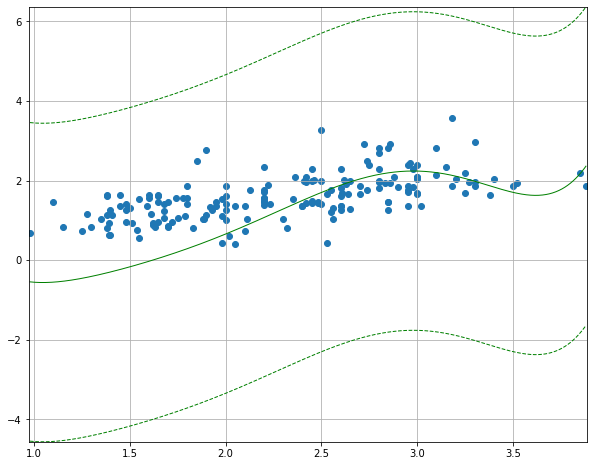

In [16]:
plt.figure(figsize=(10, 8))
plt.autoscale(tight=True)
plt.scatter(x, y)
fx = sp.linspace(min(x), max(x), 1000)
plt.plot(fx, f_LSM(fx), linewidth=1,color='blue')
plt.figure(figsize=(10, 8))
plt.autoscale(tight=True)
plt.scatter(x, y)
plt.plot(fx, f_huber(fx), linewidth=1,color='red')
plt.plot(fx, f_huber_u(fx), linewidth=1,color='red',linestyle='--')
plt.plot(fx, f_huber_d(fx), linewidth=1,color='red',linestyle='--')
plt.figure(figsize=(10, 8))
plt.autoscale(tight=True)
plt.scatter(x, y)
plt.plot(fx, f_tukey(fx), linewidth=1,color='green')
plt.plot(fx, f_tukey_u(fx), linewidth=1,color='green',linestyle='--')
plt.plot(fx, f_tukey_d(fx), linewidth=1,color='green',linestyle='--')
plt.grid()
plt.show()

In [17]:
E_LSM=np.array([y[i]-f_LSM(x[i]) for i in range(len(x))])
E_huber=np.array([y[i]-f_huber(x[i]) for i in range(len(x))])
E_tukey=np.array([y[i]-f_tukey(x[i]) for i in range(len(x))])

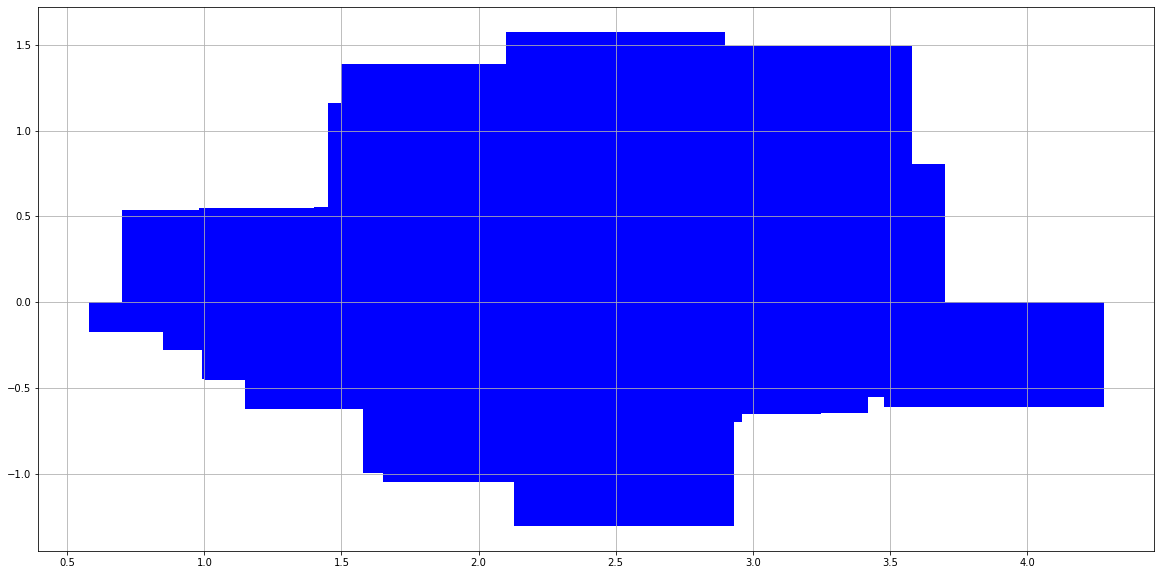

In [23]:
plt.figure(figsize=(20, 10))
plt.bar(x,E_LSM,color='blue')
plt.grid()

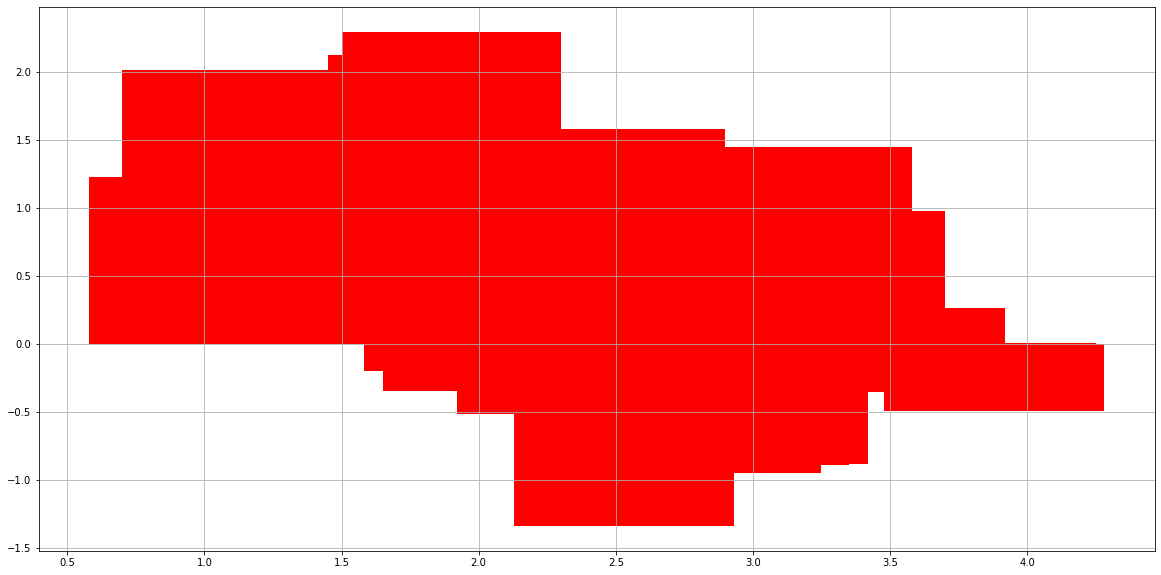

In [24]:
plt.figure(figsize=(20, 10))
plt.bar(x,E_huber,color='red')
plt.grid()

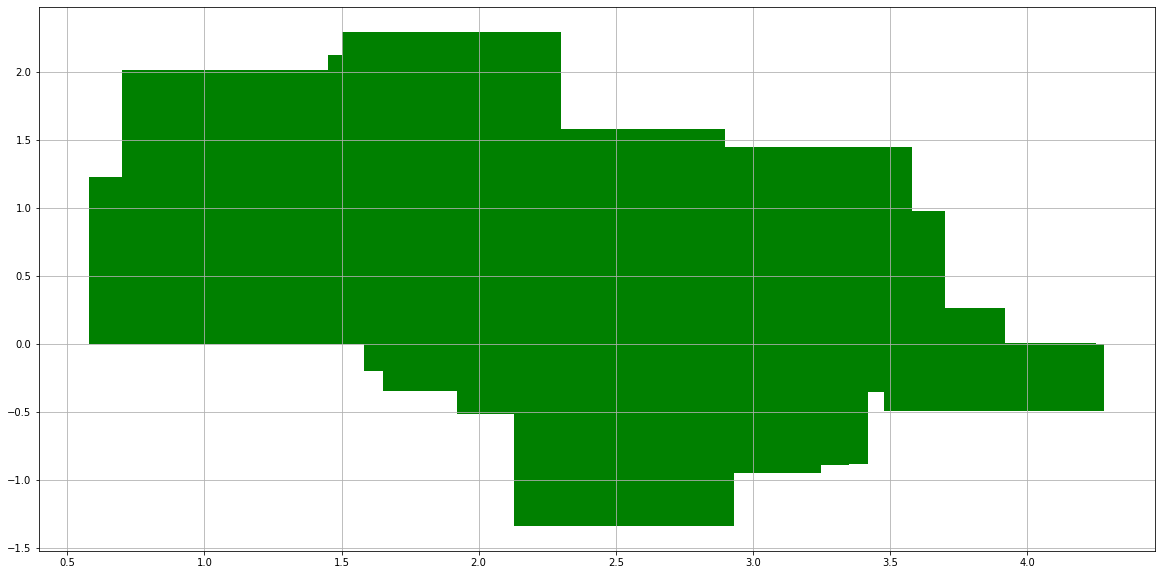

In [25]:
plt.figure(figsize=(20, 10))
plt.bar(x,E_tukey,color='green')
plt.grid()

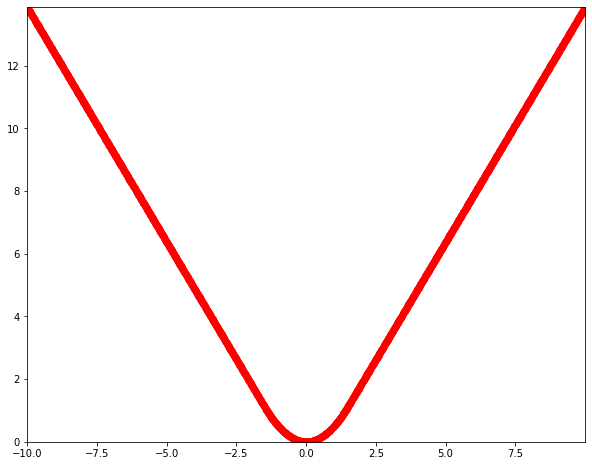

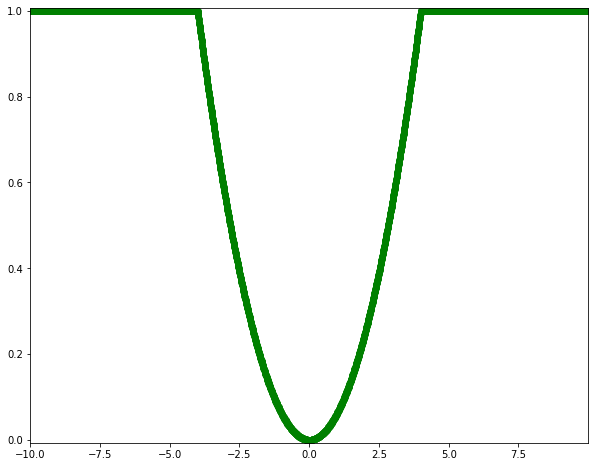

In [29]:
u=[i/100 for i in range(-1000,1000)]
h=[Huber(i,1.5)for i in u]
plt.figure(figsize=(10, 8))
plt.autoscale(tight=True)
plt.scatter(u, h,color='red',linestyle='-')
plt.figure(figsize=(10, 8))
plt.autoscale(tight=True)
t=[Tukey(i,4)for i in u]
plt.scatter(u, t,color='green',linestyle='-')